In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_scrach=pd.read_csv("C:\\Users\\Pradip\\Desktop\\Dataset\\RidingMowers.csv")
df_scrach

,Income,Lot_Size,Response
0,34,26,Not Bought
1,34,40,Not Bought
2,34,46,Not Bought
3,34,48,Not Bought
4,34,53,Not Bought
...,...,...,...
175,86,121,Bought
176,87,109,Bought
177,88,119,Bought
178,89,110,Bought


In [3]:
#df_scrach=df.iloc[0:180,:]
df_scrach.insert(0, 'Index_df', range(0, 0 + len(df_scrach)))
df_scrach

,Index_df,Income,Lot_Size,Response
0,0,34,26,Not Bought
1,1,34,40,Not Bought
2,2,34,46,Not Bought
3,3,34,48,Not Bought
4,4,34,53,Not Bought
...,...,...,...,...
175,175,86,121,Bought
176,176,87,109,Bought
177,177,88,119,Bought
178,178,89,110,Bought


In [6]:
n=len(df_scrach.columns)-1
target_column=input("please enter the Target(dependent) column Names=")
col = df_scrach.pop(target_column)
df_scrach.insert(n, col.name, col)
df_scrach.head(55)

please enter the Target(dependent) column Names=Response


,Index_df,Income,Lot_Size,Response
0,0,34,26,Not Bought
1,1,34,40,Not Bought
2,2,34,46,Not Bought
3,3,34,48,Not Bought
4,4,34,53,Not Bought
5,5,34,58,Not Bought
6,6,34,59,Not Bought
7,7,34,63,Not Bought
8,8,34,64,Not Bought
9,9,34,66,Bought


In [7]:
print(df_scrach[target_column].value_counts())
pd.crosstab(index=df_scrach[target_column],columns='Prop',normalize='all')

Not Bought    107
Bought         73
Name: Response, dtype: int64


col_0,Prop
Response,
Bought,0.405556
Not Bought,0.594444


In [8]:
df_scrach[target_column]=df_scrach[target_column].astype("category")
df_scrach[target_column]=df_scrach[target_column].cat.codes
df_scrach

,Index_df,Income,Lot_Size,Response
0,0,34,26,1
1,1,34,40,1
2,2,34,46,1
3,3,34,48,1
4,4,34,53,1
...,...,...,...,...
175,175,86,121,0
176,176,87,109,0
177,177,88,119,0
178,178,89,110,0


In [9]:
#df_scrach[target_column].replace({"setosa": 1, "versicolor": 0}, inplace=True)
df_scrach.head(5)

,Index_df,Income,Lot_Size,Response
0,0,34,26,1
1,1,34,40,1
2,2,34,46,1
3,3,34,48,1
4,4,34,53,1


In [10]:
train=int(0.7*len(df_scrach.index))
test=int(0.3*len(df_scrach.index))
train_data = df_scrach.sample(train)
test_data = df_scrach[~df_scrach.index.isin(train_data.index)]

In [11]:
train_data.head()

,Index_df,Income,Lot_Size,Response
80,80,54,55,1
105,105,60,72,1
104,104,60,35,1
61,61,48,73,1
178,178,89,110,0


In [12]:
test_data.head()

,Index_df,Income,Lot_Size,Response
1,1,34,40,1
2,2,34,46,1
3,3,34,48,1
4,4,34,53,1
5,5,34,58,1


In [13]:
test_data.index

Int64Index([  1,   2,   3,   4,   5,   6,   8,   9,  10,  12,  13,  23,  29,
             30,  31,  32,  34,  37,  38,  43,  44,  45,  46,  48,  68,  71,
             77,  87,  93,  96, 102, 103, 106, 112, 114, 115, 116, 119, 122,
            135, 139, 140, 142, 145, 149, 154, 156, 157, 158, 160, 162, 164,
            167, 172, 174],
           dtype='int64')

In [14]:
X_train = train_data.iloc[:,0:n]
y_train = train_data.iloc[:,n]
X_test = test_data.iloc[:,0:n]
y_test = test_data.iloc[:,n]

In [15]:
len(X_train.index)

125

In [16]:
i=0
E=0
K=int(input("Enter the Value of K (odd)="))
Method=input("Enter Distance method to calculate Nearest Neighbour=")[0].upper()
#DM=Method    
Dict_1 = {}
Dict_2 = {}
list_1=[]
list_2=[]
while i < len(X_test.index):
    j=0
    while j <len(X_train.index):
        k=0
        
        
            
        if Method=="E":
            ED=0
            while k < n-1:
                #Euclidean distance(ED=(((p-a)**2)+((q-b)**2)+((r-c)**2)+((s-d)**2))**0.5)
                ED=ED+(np.asarray(X_train,dtype=float)[j][k]-np.asarray(X_test,dtype=float)[i][k])**2
                E=ED**0.5
                Dict_1[X_train.index[j]] =E
                k=k+1

        elif Method=="M":
            MD=0
            while k < n-1:
                #Manhattan distance(MD=abs(p-a)+abs(q-b)+abs(r-c)+abs(s-d))
                MD=MD+abs(np.asarray(X_train,dtype=float)[j][k]-np.asarray(X_test,dtype=float)[i][k])
                Dict_1[X_train.index[j]] =MD
                k=k+1

        elif Method=="C":
            #Cosine distance
            v1=np.dot(np.asarray(X_train,dtype=float)[j],np.asarray(X_test,dtype=float)[i])
            v2=np.dot(np.asarray(X_train,dtype=float)[j],np.asarray(X_train,dtype=float)[j])
            v3=np.dot(np.asarray(X_test,dtype=float)[i],np.asarray(X_test,dtype=float)[i])
            cost=v1/(v2*v3)
            C=1-cost
            Dict_1[X_train.index[j]] =C

        elif Method=="J":
            #jaccard distance
            set1=set(np.asarray(X_test,dtype=float)[i].tolist())
            set2=set(np.asarray(X_train,dtype=float)[j].tolist())

            L1=len(set1.intersection(set2))
            L2=len(set1.union(set2))
            JI=L1/L2
            J=1-JI
            Dict_1[X_train.index[j]] =J

        elif Method=="H":
            #Hamming Distance
            H=len(set1^set2)
            Dict_1[X_train.index[j]] =H


        
        j=j+1
    sorted_dic= dict(sorted(Dict_1.items(),key=lambda x: x[1]))
    sort=list(sorted_dic.items())[:5]
    list_new=[df_scrach[target_column][item[0]] for item in sort]
    #Dict_2[i]=list_new
    list_2.append(max(list_new,key=list_new.count))
    #max(lst,key=lst.count)
    #print(Dict_2)
    i=i+1
print(list_2) 
print(sort)       
        

Enter the Value of K (odd)=5
Enter Distance method to calculate Nearest Neighbour=e
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[(175, 1.0), (173, 1.4142135623730951), (176, 2.23606797749979), (171, 3.1622776601683795), (177, 3.605551275463989)]


In [18]:
test_y=np.asarray(y_test)
test_y

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [19]:
predict_y=np.asarray(list_2)
predict_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [20]:
TP,TN,FN,FP=0,0,0,0
for i in range(len(test_y)):
    if test_y[i]==1 and predict_y[i]==1:
        TP=TP+1
    elif test_y[i]==0 and predict_y[i]==0:
        TN=TN+1
    elif test_y[i]==0 and predict_y[i]==1:
        FN=FN+1
    else:
        FP=FP+1
        
values=np.array([[TN,FP],[FN,TP]])
values

array([[19,  3],
       [ 3, 30]])

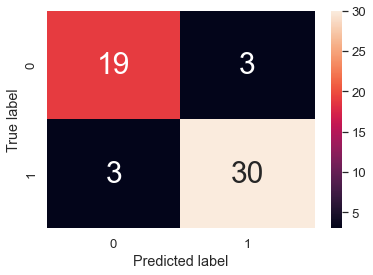

In [21]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
max_1=max(TP,FN,FP,TN)
min_1=min(TP,FN,FP,TN)
array = np.array([[TN,FP],[FN,TP]])

df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": max_1}) # font size
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [22]:
#True Positive Rate
TPR=TP/(TP+FN)
#False Positive Rate
FPR=FP/(FP+TN)
print("TPR=",TPR)
print("FPR=",FPR)

TPR= 0.9090909090909091
FPR= 0.13636363636363635


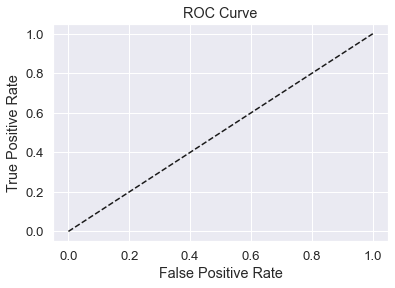

In [23]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [24]:
Acc=((TP+TN)/(TP+FP+TN+FN))*100
print("Accuracy in % = ",Acc)
Recall=TP/(TP+FN)
print("Recall = ",Recall)
Precision=TP/(TP+FP)
print("Precision = ",Precision)
f1_score=(2*Recall*Precision)/(Recall+Precision)
print("f1_score = ",f1_score)

Accuracy in % =  89.0909090909091
Recall =  0.9090909090909091
Precision =  0.9090909090909091
f1_score =  0.9090909090909091


# cross_check

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit( X_train , y_train )
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[19  3]
 [ 3 30]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.91      0.91      0.91        33

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55

